<a href="https://colab.research.google.com/github/jov580/astro-vezbe/blob/main/Zakoni_zracenja_i_zvezde.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

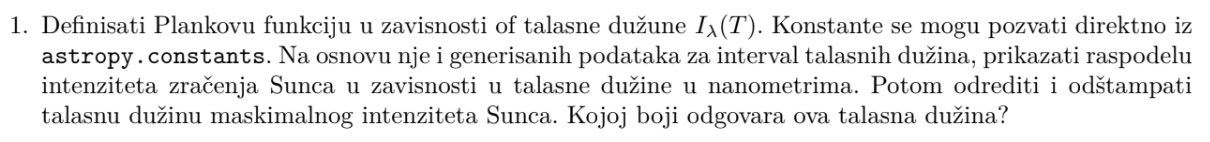

In [ ]:
import numpy as np
import astropy
from astropy import units
from astropy.constants import h, c, k_B


T_sunca = 5778 * astropy.units.K

talasne_duzine_nm = np.linspace(10, 3000, 1000)
talasne_duzine_m = talasne_duzine_nm * 1e-9
talasne_duzine_m = talasne_duzine_m * astropy.units.m

intensity = (2 * astropy.constants.h * astropy.constants.c**2 / talasne_duzine_m**5) / (np.exp((astropy.constants.h * astropy.constants.c) / (talasne_duzine_m * astropy.constants.k_B * T_sunca)) - 1)
intensities = intensity.to(astropy.units.W / (astropy.units.m**2 * astropy.units.nm))


max_intensity_index = np.argmax(intensities)
max_talasna_duzina_nm = talasne_duzine_nm[max_intensity_index]
print(f'Talasna dužina maksimalnog intenziteta Sunca: {max_talasna_duzina_nm:.2f} nm')

Talasna dužina maksimalnog intenziteta Sunca: 500.85 nm


Ova talasna duzina spada u zelenu boju.

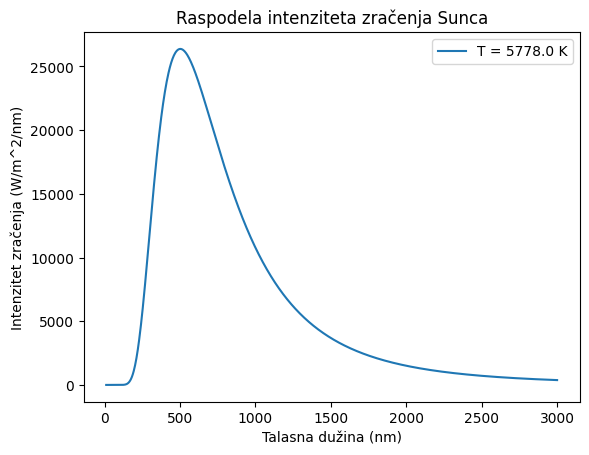

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(talasne_duzine_nm, intensities, label=f'T = {T_sunca}')
plt.xlabel('Talasna dužina (nm)')
plt.ylabel('Intenzitet zračenja (W/m^2/nm)')
plt.title('Raspodela intenziteta zračenja Sunca')
plt.legend()
plt.show()

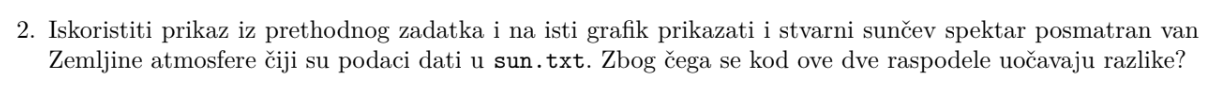

In [ ]:
import pandas as pd

podaci = pd.read_csv('sun.txt', sep='\t', header=None, names=['talasne_duzine_sunca', 'intenziteti_sunca'], skiprows = 2)

print(podaci)

     talasne_duzine_sunca  intenziteti_sunca
0            1.500000e-09       9.617081e+08
1            2.500000e-09       6.886413e+08
2            3.500000e-09       3.506779e+08
3            4.500000e-09       9.013828e+08
4            5.500000e-09       7.777346e+08
..                    ...                ...
979          2.368280e-06       2.712766e+12
980          2.379370e-06       2.688037e+12
981          2.390420e-06       2.628627e+12
982          2.401400e-06       2.588202e+12
983          2.412340e-06       2.541574e+12

[984 rows x 2 columns]


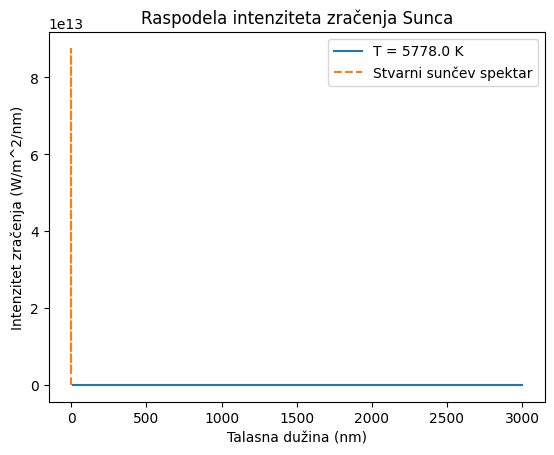

In [ ]:
plt.figure()
plt.plot(talasne_duzine_nm, intensities, label=f'T = {T_sunca}')
plt.plot(podaci['talasne_duzine_sunca'], podaci['intenziteti_sunca'], label='Stvarni sunčev spektar', linestyle='--')
plt.xlabel('Talasna dužina (nm)')
plt.ylabel('Intenzitet zračenja (W/m^2/nm)')
plt.title('Raspodela intenziteta zračenja Sunca')
plt.legend()
plt.show()

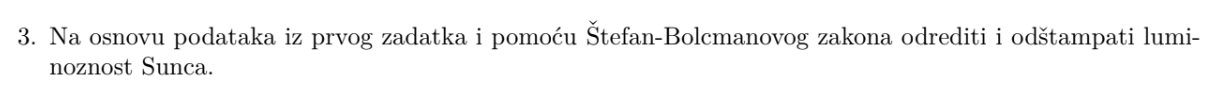

In [ ]:
vinova_const = 2.897 * 10**-3
sb_const = 5.67 * 10**-8
radius = 6.96 * 10**8
lambda_max = 500.85 * 10**-9

temperatura = vinova_const / lambda_max

luminoznost = 4 * 3.141592653589793 * radius **2 * sb_const * temperatura**4

temperatura, luminoznost

(5784.166916242387, 3.863444435125856e+26)

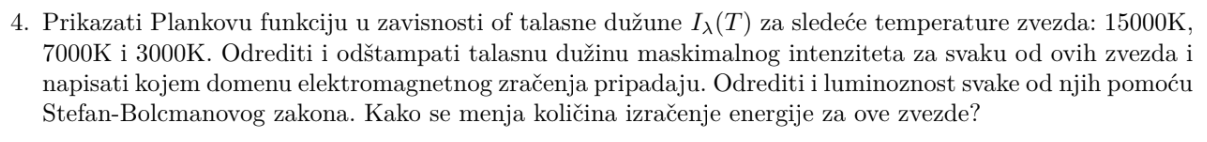

<ipython-input-29-1e20fe812a05>:14: RuntimeWarning: overflow encountered in exp
  return (2*h*c**2) / (wavelength**5) / (np.exp((h*c) / (wavelength * k_B * T)) - 1)


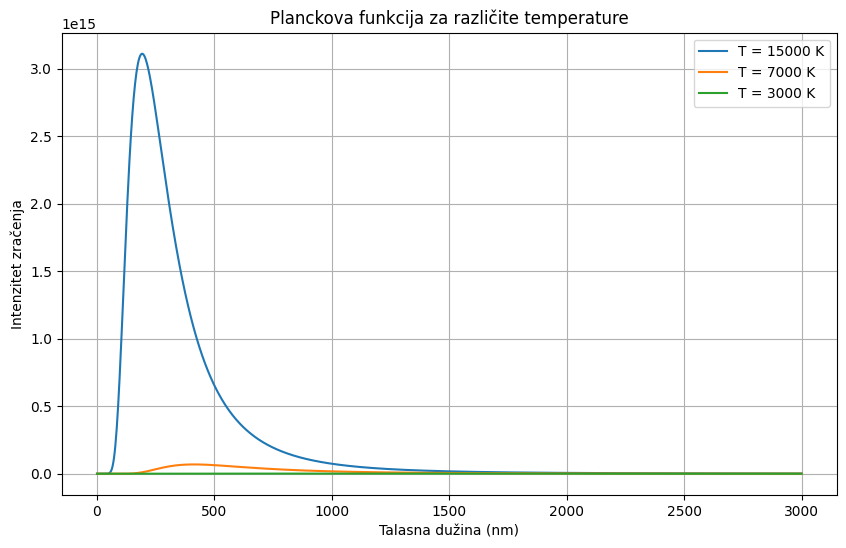

Temperatura: 15000 K
Talasna dužina maksimalnog intenziteta: 193.18 nm
Oblast elektromagnetnog spektra: Ultraviolet
Luminoznost: 2.87e+09 W/m²
Temperatura: 7000 K
Talasna dužina maksimalnog intenziteta: 413.97 nm
Oblast elektromagnetnog spektra: Visible light
Luminoznost: 1.36e+08 W/m²
Temperatura: 3000 K
Talasna dužina maksimalnog intenziteta: 965.92 nm
Oblast elektromagnetnog spektra: Infrared
Luminoznost: 4.59e+06 W/m²


In [ ]:

import numpy as np
import matplotlib.pyplot as plt


h = 6.62607015e-34
c = 2.99792458e8
k_B = 1.380649e-23
sigma = 5.670374419e-8
b = 2.897771955e-3

temperatures = [15000, 7000, 3000]

def planck_function(wavelength, T):
    return (2*h*c**2) / (wavelength**5) / (np.exp((h*c) / (wavelength * k_B * T)) - 1)

wavelengths = np.linspace(1e-9, 3e-6, 1000)

plt.figure(figsize=(10, 6))

for T in temperatures:
    intensity = planck_function(wavelengths, T)
    plt.plot(wavelengths*1e9, intensity, label=f'T = {T} K')

plt.xlabel('Talasna dužina (nm)')
plt.ylabel('Intenzitet zračenja')
plt.title('Planckova funkcija za različite temperature')
plt.legend()
plt.grid(True)
plt.show()

lambda_max = [b / T for T in temperatures]

spectrum_domains = []
for lambda_m in lambda_max:
    if lambda_m < 1e-9:
        spectrum_domains.append('Gamma rays')
    elif lambda_m < 1e-7:
        spectrum_domains.append('X-rays')
    elif lambda_m < 4e-7:
        spectrum_domains.append('Ultraviolet')
    elif lambda_m < 7e-7:
        spectrum_domains.append('Visible light')
    elif lambda_m < 1e-3:
        spectrum_domains.append('Infrared')
    elif lambda_m < 1e-1:
        spectrum_domains.append('Microwaves')
    else:
        spectrum_domains.append('Radio waves')

luminosities = [sigma * T**4 for T in temperatures]

for i, T in enumerate(temperatures):
    print(f'Temperatura: {T} K')
    print(f'Talasna dužina maksimalnog intenziteta: {lambda_max[i]*1e9:.2f} nm')
    print(f'Oblast elektromagnetnog spektra: {spectrum_domains[i]}')
    print(f'Luminoznost: {luminosities[i]:.2e} W/m²')

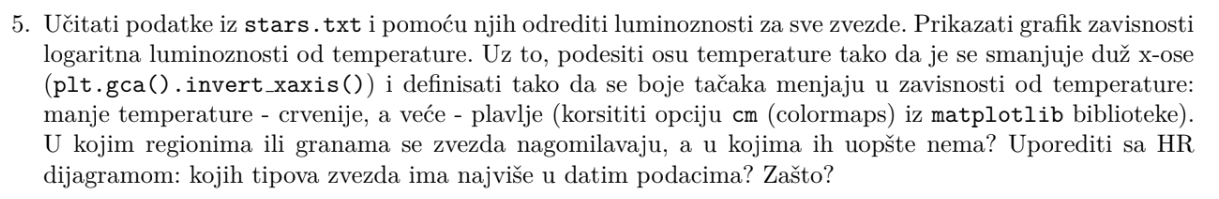

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import pandas as pd
from astropy import constants as const

sigma = const.sigma_sb.value

podaci = pd.read_csv('stars.txt', sep=' ', header=None, names=['ime_zvezde', 'poluprecnik', 'temperatura'], dtype={'poluprecnik': float, 'temperatura': float}, skiprows = 1)

luminoznost = []

for index, podatak in podaci.iterrows():
  luminoznost.append(4 * np.pi * (podatak['poluprecnik'] * 695500000) ** 2 * sigma * podatak['temperatura'] ** 4)

temperatura = podaci['temperatura']

log_luminoznost = np.log10(luminoznost)

colors = cm.Spectral((temperatura - min(temperatura)) / (max(temperatura) - min(temperatura)))

plt.figure()
plt.ylabel('Logaritam Luminoznosti')
plt.xlabel('Temperatura')
plt.title('HR dijagram najsjajnijih zvezda na nebu')
plt.gca().invert_xaxis()
plt.scatter(temperatura, log_luminoznost, c=temperatura, cmap="Spectral")
plt.show()
